# Assignment 1 - STQD - Machine Learning
-   Ahmad Hathim bin Ahmad Azman
-   

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

In [12]:
hitters_df = pd.read_csv("G:/My Drive/Master-Data-Science/Semester_2/Machine Learning/data/hitters.csv")

In [13]:
hitters_df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,#NAME?,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,#NAME?,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,#NAME?,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,#NAME?,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [14]:
hitters_df_clean = hitters_df.dropna().drop('Unnamed: 0', axis=1)
dummies = pd.get_dummies(hitters_df_clean[['League', 'Division', 'NewLeague']])
y = hitters_df_clean.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = hitters_df_clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

In [16]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=1)

## Forward Selection

In [32]:
?SFS

Init signature:
SFS(
    estimator,
    k_features=1,
    forward=True,
    floating=False,
    verbose=0,
    scoring=None,
    cv=5,
    n_jobs=1,
    pre_dispatch='2*n_jobs',
    clone_estimator=True,
    fixed_features=None,
    feature_groups=None,
)
Docstring:     
Sequential Feature Selection for Classification and Regression.

Parameters
----------
estimator : scikit-learn classifier or regressor
k_features : int or tuple or str (default: 1)
    Number of features to select,
    where k_features < the full feature set.
    New in 0.4.2: A tuple containing a min and max value can be provided,
        and the SFS will consider return any feature combination between
        min and max that scored highest in cross-validation. For example,
        the tuple (1, 4) will return any combination from
        1 up to 4 features instead of a fixed number of features k.
    New in 0.8.0: A string argument "best" or "parsimonious".
        If "best" is provided, the feature selector will r

In [36]:
sfs = SFS(model,
          k_features=(1, 19),  # From 1 to n features
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          cv=cv,
          n_jobs=-1)

sfs = sfs.fit(X, y)

In [ ]:
results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
results['num_features'] = results.index.astype(int)

# Find the best model (highest CV R²)
best_row = results.loc[results['avg_score'].idxmax()]

print("Best number of features:", int(best_row['num_features']))
print("Best Negative Mean Squared Error score (CV):", best_row['avg_scor'])
print("Selected features:", sfs.k_feature_names_)


Best number of features: 12


KeyError: 'r2'

In [31]:
results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,num_features,r2
1,"(11,)","[-150719.90152067962, -80802.21037108556, -178...",-141596.656787,"(CRBI,)",42697.069648,33219.770759,16609.885379,1,-141596.656787
2,"(1, 11)","[-138311.05287668988, -67434.3357811182, -1793...",-121606.26829,"(Hits, CRBI)",47258.397739,36768.638978,18384.319489,2,-121606.26829
3,"(1, 11, 17)","[-132025.28837550714, -60538.35833237717, -183...",-117566.838048,"(Hits, CRBI, Division_W)",51764.184725,40274.294331,20137.147166,3,-117566.838048
4,"(1, 11, 13, 17)","[-131795.0415864027, -68108.86259776434, -1827...",-113408.753932,"(Hits, CRBI, PutOuts, Division_W)",51826.781274,40322.996573,20161.498286,4,-113408.753932
5,"(0, 1, 11, 13, 17)","[-132384.97069794714, -71965.89911301556, -178...",-110576.927222,"(AtBat, Hits, CRBI, PutOuts, Division_W)",51583.119223,40133.419219,20066.709609,5,-110576.927222
6,"(0, 1, 5, 11, 13, 17)","[-127062.9111629954, -70452.00002805918, -1766...",-107722.23395,"(AtBat, Hits, Walks, CRBI, PutOuts, Division_W)",51275.224063,39893.866324,19946.933162,6,-107722.23395
7,"(0, 1, 5, 11, 13, 16, 17)","[-126725.9419282866, -70424.5576899343, -17641...",-107272.866586,"(AtBat, Hits, Walks, CRBI, PutOuts, League_N, ...",51421.062069,40007.333248,20003.666624,7,-107272.866586
8,"(0, 1, 5, 11, 13, 14, 16, 17)","[-126654.46252176896, -71308.87583650561, -176...",-107340.96626,"(AtBat, Hits, Walks, CRBI, PutOuts, Assists, L...",51126.430072,39778.099544,19889.049772,8,-107340.96626
9,"(0, 1, 5, 6, 11, 13, 14, 16, 17)","[-128317.37653425099, -69091.94295797347, -173...",-107414.253631,"(AtBat, Hits, Walks, Years, CRBI, PutOuts, Ass...",49955.473767,38867.055757,19433.527879,9,-107414.253631
10,"(0, 1, 5, 6, 11, 12, 13, 14, 16, 17)","[-127729.42185405747, -71991.73275321741, -172...",-107825.765984,"(AtBat, Hits, Walks, Years, CRBI, CWalks, PutO...",48073.726878,37402.992748,18701.496374,10,-107825.765984


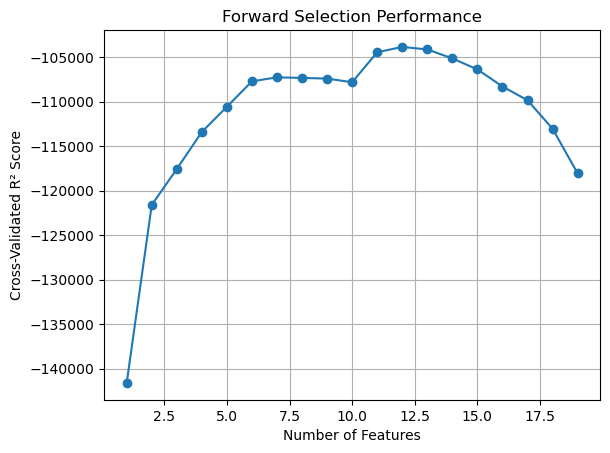

In [28]:
# Optional: plot R² vs number of features
plt.plot(results['num_features'], results['r2'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validated R² Score')
plt.title('Forward Selection Performance')
plt.grid(True)
plt.show()

## Backward Selection

## Stepwise Selection